#### Observations
1. The peak of our Latitude vs Max Temperature scatterplot occurs slightly north of the equator at around 20 degrees north. When you deviate away from this peak in either direction (i.e. either increase or decrease latitude), max temperature drops.
2. The only regression analyses which demonstrate a trend other than weak positive/negative correlation is that of the regression between latitude and max temperature for a given location (i.e. there is no significant correlation between lat vs humidity, lat vs cloudiness, and lat vs wind speed, meaning that there isn't much to be gleaned from the data).
3. the lat vs. temp regression for the northern hemisphere has an r-value of -0.7, indicating a strong negative correlation (ie. the higher your latitude, the lower the max temp), while the lat vs temp regression for the southern hemisphere has an r-value of 0.78, indicating a strong positive correlation (i.e. the higher your latitude, the higher your max temp)

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
import scipy.stats as sts
from scipy.stats import linregress
import os

# Import API key
from api_keys import weather_key


# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
output_data_file = "output_data/cities.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

In [2]:
## List for holding lat_lngs and cities
lat_lngs = []
cities = []

## Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

## Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    ## If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

## Print the city count to confirm sufficient count
len(cities)

614

## Data Gathering

In [3]:
## Create some empty lists to store our data
lat = []
lng = []
temp = []
humid = []
cloud = []
wind_sp = []
city_n = []
country = []
date = []

## Loop through our cities and use an API call to gather relevant data
units = "imperial"
url = "http://api.openweathermap.org/data/2.5/weather?appid="+ weather_key + "&units=" + units + "&q="
print("-------------------------\nBegin Data Retrieval\n-------------------------\n")
index = 1
for city in cities:
    try:
        response = requests.get(url+city).json()
        print(f"Processing Record {cities.index(city) +1} | {city}")
        lat.append(response["coord"]["lat"])
        lng.append(response["coord"]["lon"])
        temp.append(response["main"]["temp_max"])
        humid.append(response["main"]["humidity"])
        cloud.append(response["clouds"]["all"])
        wind_sp.append(response["wind"]["speed"])
        city_n.append(response["name"])
        country.append(response["sys"]["country"])
        date.append(response["dt"])
        
    except(KeyError):
        print(f"{city} not found. Skipping...")
        
print("\n-------------------------\nData Retrieval Complete\n-------------------------")

-------------------------
Begin Data Retrieval
-------------------------

Processing Record 1 | yellowknife
Processing Record 2 | bandarbeyla
Processing Record 3 | tasiilaq
Processing Record 4 | tuktoyaktuk
Processing Record 5 | toktogul
Processing Record 6 | haines junction
Processing Record 7 | rikitea
Processing Record 8 | saint-augustin
Processing Record 9 | kloulklubed
Processing Record 10 | jimani
Processing Record 11 | kapaa
Processing Record 12 | angoche
Processing Record 13 | nanakuli
Processing Record 14 | bluff
Processing Record 15 | zhigansk
Processing Record 16 | provideniya
Processing Record 17 | butaritari
Processing Record 18 | mar del plata
Processing Record 19 | tumannyy
tumannyy not found. Skipping...
Processing Record 20 | bambous virieux
Processing Record 21 | kaitangata
Processing Record 22 | faya
Processing Record 23 | methoni
Processing Record 24 | oxapampa
Processing Record 25 | atuona
Processing Record 26 | ushuaia
Processing Record 27 | kisangani
Processing R

In [4]:
## Store into dataframe

weather_pd = pd.DataFrame({
    "City" : city_n,
    "Lat" : lat,
    "Lng" : lng,
    "Max Temp" : temp,
    "Humidity" : humid,
    "Cloudiness" : cloud,
    "Wind Speed" : wind_sp,
    "Country" : city_n,
    "Date" : date
})
weather_pd.count()

City          558
Lat           558
Lng           558
Max Temp      558
Humidity      558
Cloudiness    558
Wind Speed    558
Country       558
Date          558
dtype: int64

In [5]:
## Display dataframe

weather_pd

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,Yellowknife,62.4560,-114.3525,53.56,46,52,13.00,Yellowknife,1624475484
1,Bandarbeyla,9.4942,50.8122,77.00,80,100,30.00,Bandarbeyla,1624475716
2,Tasiilaq,65.6145,-37.6368,46.56,68,98,4.29,Tasiilaq,1624475716
3,Tuktoyaktuk,69.4541,-133.0374,46.40,81,75,5.75,Tuktoyaktuk,1624475716
4,Toktogul,41.8708,72.9402,65.32,46,3,0.49,Toktogul,1624475717
...,...,...,...,...,...,...,...,...,...
553,Bayjī,34.9311,43.4870,90.54,18,0,11.77,Bayjī,1624475948
554,Narsaq,60.9167,-46.0500,48.42,88,100,8.68,Narsaq,1624475949
555,Buguruslan,53.6554,52.4420,67.89,83,100,2.21,Buguruslan,1624475949
556,Djibo,14.1022,-1.6306,95.99,29,29,14.76,Djibo,1624475949


In [6]:
## Use describe function

weather_pd.describe()

,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Date
count,558.000000,558.000000,558.000000,558.000000,558.000000,558.000000,5.580000e+02
mean,20.902245,20.248484,68.581219,70.021505,54.103943,7.706272,1.624476e+09
std,33.645771,90.110761,14.558677,19.938854,39.785465,5.491987,8.320397e+01
min,-54.800000,-175.200000,34.630000,8.000000,0.000000,0.000000,1.624475e+09
25%,-6.816700,-59.705275,58.382500,60.000000,14.250000,3.902500,1.624476e+09
50%,24.953600,26.678850,70.135000,74.000000,55.000000,6.230000,1.624476e+09
75%,49.116800,97.505375,78.850000,84.000000,98.000000,10.405000,1.624476e+09
max,78.218600,179.316700,107.150000,100.000000,100.000000,34.490000,1.624476e+09


In [7]:
## Save data to csv

weather_pd.to_csv("output_data.csv", index=False)

## Scatter Plots

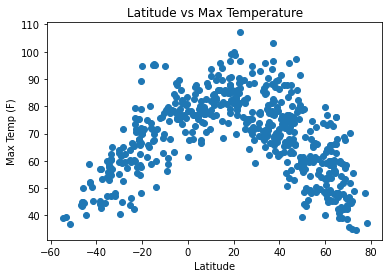

In [8]:
## Create scatter plot of latitude vs Temperature

plt.scatter(weather_pd["Lat"], weather_pd["Max Temp"])
plt.title("Latitude vs Max Temperature")
plt.xlabel("Latitude")
plt.ylabel("Max Temp (F)")
plt.savefig("latVsTemp.png")

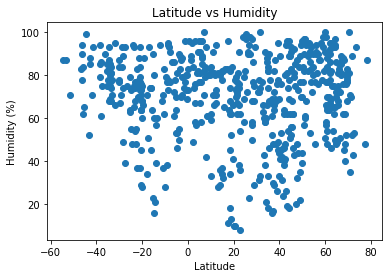

In [9]:
## Create scatter plot of latitude vs Humidity

plt.scatter(weather_pd["Lat"], weather_pd["Humidity"])
plt.title("Latitude vs Humidity")
plt.xlabel("Latitude")
plt.ylabel("Humidity (%)")
plt.savefig("latvsHumid.png")

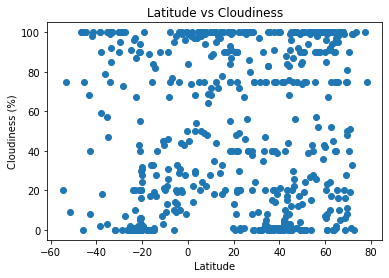

In [10]:
## Create scatter plot of latitude vs Cloudiness

plt.scatter(weather_pd["Lat"], weather_pd["Cloudiness"])
plt.title("Latitude vs Cloudiness")
plt.xlabel("Latitude")
plt.ylabel("Cloudiness (%)")
plt.savefig("latVsCloud.png")

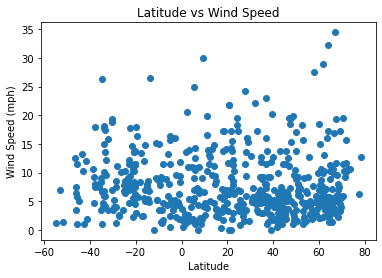

In [11]:
## Create scatter plot of latitude vs Wind Speed

plt.scatter(weather_pd["Lat"], weather_pd["Wind Speed"])
plt.title("Latitude vs Wind Speed")
plt.xlabel("Latitude")
plt.ylabel("Wind Speed (mph)")
plt.savefig("latVsWind.png")

## Linear Regression

In [13]:
## separate our data into respective hemispheres (0 degrees and above for northern, below 0 for southern)
north_hem_df = weather_pd.loc[weather_pd["Lat"] >= 0]
south_hem_df = weather_pd.loc[weather_pd["Lat"] < 0]

## To make things easier, let's define a function for regression
def regression(x,y):
    (slope, intercept, rvalue, pvalue, stderr) = sts.linregress(x,y)
    regress_values = x * slope + intercept
    lin_eq = 'y =' + str(round(slope, 2)) + 'x +' +str(round(intercept, 2))
    plt.scatter(x,y)
    plt.plot(x, regress_values, 'r-')
    print(f"The r-value is: {rvalue}")
    return lin_eq

### Latitude vs Max Temp Regressions

The r-value is: -0.7018189111660015


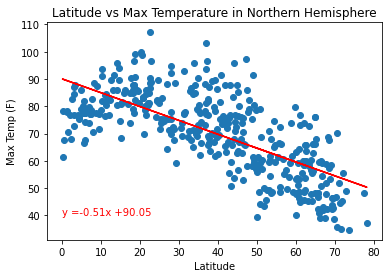

In [14]:
## Plot regression for Latitude vs Max Temp in Northern Hemisphere

regression_plot = regression(north_hem_df["Lat"], north_hem_df["Max Temp"])
plt.annotate(regression_plot, (0,40), color = "red", fontsize = 10)
plt.title("Latitude vs Max Temperature in Northern Hemisphere")
plt.xlabel("Latitude")
plt.ylabel("Max Temp (F)")
plt.savefig("nlatVsTemp.png")

The r-value is: 0.7824583213350002


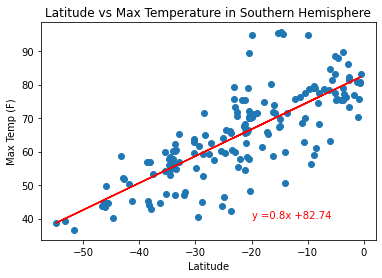

In [15]:
## Plot regression for Latitude vs Max Temp in Southern Hemisphere

regression_plot = regression(south_hem_df["Lat"], south_hem_df["Max Temp"])
plt.annotate(regression_plot, (-20,40), color = "red", fontsize = 10)
plt.title("Latitude vs Max Temperature in Southern Hemisphere")
plt.xlabel("Latitude")
plt.ylabel("Max Temp (F)")
plt.savefig("slatVsTemp.png")

### Latitude vs Humidity Regressions

The r-value is: 0.05400641627306973


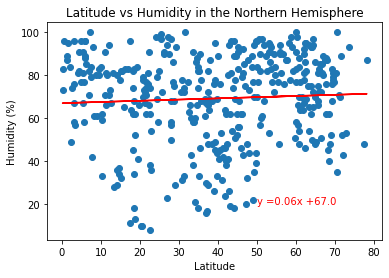

In [16]:
## Plot regression for Latitude vs Humidity in Northern Hemisphere

regression_plot = regression(north_hem_df["Lat"], north_hem_df["Humidity"])
plt.annotate(regression_plot, (50,20), color = "red", fontsize = 10)
plt.title("Latitude vs Humidity in the Northern Hemisphere")
plt.xlabel("Latitude")
plt.ylabel("Humidity (%)")
plt.savefig("nlatvsHumid.png")

The r-value is: -0.1978008320134549


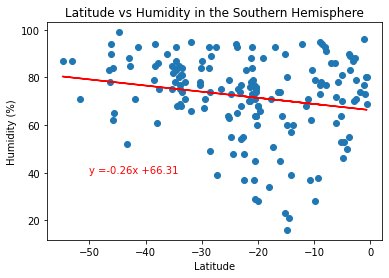

In [17]:
## Plot regression for Latitude vs Humidity in Southern Hemisphere

regression_plot = regression(south_hem_df["Lat"], south_hem_df["Humidity"])
plt.annotate(regression_plot, (-50,40), color = "red", fontsize = 10)
plt.title("Latitude vs Humidity in the Southern Hemisphere")
plt.xlabel("Latitude")
plt.ylabel("Humidity (%)")
plt.savefig("slatvsHumid.png")

### Latitude vs Cloudiness Regressions

The r-value is: -0.06450384049494401


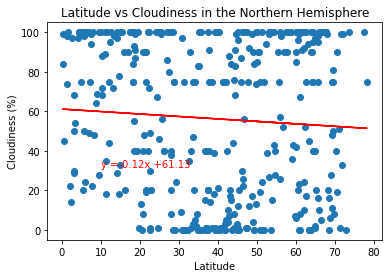

In [18]:
## Plot regression for Latitude vs Cloudiness in Northern Hemisphere

regression_plot = regression(north_hem_df["Lat"], north_hem_df["Cloudiness"])
plt.annotate(regression_plot, (10,32), color = "red", fontsize = 10)
plt.title("Latitude vs Cloudiness in the Northern Hemisphere")
plt.xlabel("Latitude")
plt.ylabel("Cloudiness (%)")
plt.savefig("nlatVsCloud.png")

The r-value is: -0.2659579529641966


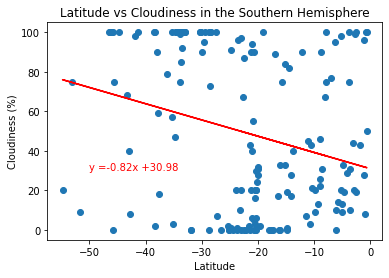

In [19]:
## Plot regression for Latitude vs Cloudiness in Southern Hemisphere

regression_plot = regression(south_hem_df["Lat"], south_hem_df["Cloudiness"])
plt.annotate(regression_plot, (-50,30), color = "red", fontsize = 10)
plt.title("Latitude vs Cloudiness in the Southern Hemisphere")
plt.xlabel("Latitude")
plt.ylabel("Cloudiness (%)")
plt.savefig("slatVsCloud.png")

### Latitude vs Wind Speed Regressions

The r-value is: 0.007927186599232897


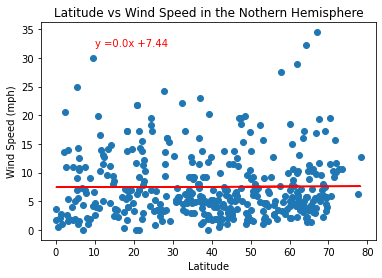

In [20]:
## Plot regression for Latitude vs Wind Speed in Northern Hemisphere

regression_plot = regression(north_hem_df["Lat"], north_hem_df["Wind Speed"])
plt.annotate(regression_plot, (10,32), color = "red", fontsize = 10)
plt.title("Latitude vs Wind Speed in the Nothern Hemisphere")
plt.xlabel("Latitude")
plt.ylabel("Wind Speed (mph)")
plt.savefig("nlatVsWind.png")

The r-value is: -0.05799635691011752


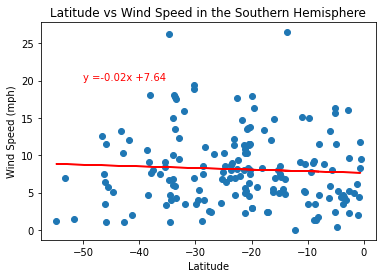

In [21]:
## Plot regression for Latitude vs Wind Speed in Souther Hemisphere

regression_plot = regression(south_hem_df["Lat"], south_hem_df["Wind Speed"])
plt.annotate(regression_plot, (-50,20), color = "red", fontsize = 10)
plt.title("Latitude vs Wind Speed in the Southern Hemisphere")
plt.xlabel("Latitude")
plt.ylabel("Wind Speed (mph)")
plt.savefig("slatVsWind.png")